In [ ]:
!pip install opencv-python matplotlib scikit-learn ultralytics lxml
!pip install tensorflow

In [ ]:
import xml.etree.ElementTree as ET
import pandas as pd

def xml_to_csv(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    xml_list = []
    for member in root.findall('object'):
        filename = root.find('filename').text if root.find('filename') is not None else 'Unknown'
        width = int(root.find('size/width').text) if root.find('size/width') is not None else 0
        height = int(root.find('size/height').text) if root.find('size/height') is not None else 0
        class_name = member[0].text if member[0] is not None else 'Unknown'
        xmin = int(member[4][0].text) if member[4][0] is not None else 0
        ymin = int(member[4][1].text) if member[4][1] is not None else 0
        xmax = int(member[4][2].text) if member[4][2] is not None else 0
        ymax = int(member[4][3].text) if member[4][3] is not None else 0

        value = (filename, width, height, class_name, xmin, ymin, xmax, ymax)
        xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    return pd.DataFrame(xml_list, columns=column_name)


from google.colab import files
uploaded = files.upload()


xml_file_path = next(iter(uploaded))


xml_df = xml_to_csv(xml_file_path)
xml_df.to_csv("/content/annotations.csv", index=False)
print("CSV file saved as annotations.csv")

Saving vehicle_annotation.xml to vehicle_annotation (1).xml
CSV file saved as annotations.csv


In [ ]:
yaml_content = """
train: /content/datasets/train
val: /content/datasets/val
nc: 5
names: ['bus', 'car', 'truck', 'motorcycle', 'ambulance']"""



with open('/content/vehicle.yaml', 'w') as f:
    f.write(yaml_content)



In [ ]:
import os
print("Training images:", os.listdir('/content/datasets/train')[:5])
print("Validation images:", os.listdir('/content/datasets/val')[:5])

Training images: ['labels', 'images']
Validation images: ['labels', 'images']


In [ ]:
from ultralytics import YOLO


model = YOLO('yolov8n.pt')

yaml_file_path = '/content/vehicle.yaml'


results = model.train(
    data=yaml_file_path,
    imgsz=640,
    epochs=50,
    batch=16,
)

Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/vehicle.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True,

100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/train/labels... 42 images, 20 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<00:00, 482.89it/s]

train: New cache created: /content/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/datasets/val/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1479.09it/s]

val: New cache created: /content/datasets/val/labels.cache


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train21
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.132      3.785      1.642         17        640: 100%|██████████| 4/4 [01:06<00:00, 16.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:24<00:00, 12.36s/it]

                   all         60        114    0.00696      0.943      0.107     0.0747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.9217      3.569      1.397         26        640: 100%|██████████| 4/4 [00:56<00:00, 14.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.57s/it]

                   all         60        114    0.00697      0.937      0.168      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.9239       3.46      1.425         34        640: 100%|██████████| 4/4 [00:51<00:00, 12.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.75s/it]

                   all         60        114    0.00663      0.898      0.191       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.8456      3.145      1.395         33        640: 100%|██████████| 4/4 [00:55<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.27s/it]

                   all         60        114    0.00612       0.92      0.225      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.7532      2.809      1.246         36        640: 100%|██████████| 4/4 [00:54<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.18s/it]

                   all         60        114    0.00615       0.92      0.231      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.6741      2.833      1.234         23        640: 100%|██████████| 4/4 [00:52<00:00, 13.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.20s/it]

                   all         60        114    0.00612       0.92       0.22       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.7636      2.668      1.288         28        640: 100%|██████████| 4/4 [00:52<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.42s/it]

                   all         60        114    0.00579      0.909      0.243       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.7769      2.722       1.26         31        640: 100%|██████████| 4/4 [00:54<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.04s/it]

                   all         60        114     0.0053      0.881      0.254       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.7604      2.374      1.273         24        640: 100%|██████████| 4/4 [00:53<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.12s/it]

                   all         60        114    0.00493      0.864      0.271      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.7153      2.113      1.213         27        640: 100%|██████████| 4/4 [00:53<00:00, 13.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.33s/it]

                   all         60        114    0.00521      0.881      0.328      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.7706      2.175      1.298         33        640: 100%|██████████| 4/4 [00:52<00:00, 13.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.21s/it]

                   all         60        114          1     0.0468      0.318      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.8088      2.285      1.298         24        640: 100%|██████████| 4/4 [00:52<00:00, 13.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.73s/it]

                   all         60        114          1     0.0786      0.247      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.6857      1.898      1.181         41        640: 100%|██████████| 4/4 [00:55<00:00, 13.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.52s/it]

                   all         60        114      0.605     0.0395      0.226      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.8372      1.932      1.275         32        640: 100%|██████████| 4/4 [00:52<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.51s/it]

                   all         60        114      0.583      0.039      0.216      0.137



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.7037      1.867      1.169         36        640: 100%|██████████| 4/4 [00:51<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.42s/it]

                   all         60        114       0.79      0.039      0.207      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.7517      1.826      1.274         37        640: 100%|██████████| 4/4 [00:51<00:00, 12.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.71s/it]

                   all         60        114      0.627     0.0974       0.23      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.6744      1.731      1.157         30        640: 100%|██████████| 4/4 [00:53<00:00, 13.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         60        114      0.734      0.181      0.277      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.7246      1.751      1.225         40        640: 100%|██████████| 4/4 [00:53<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.25s/it]

                   all         60        114      0.527      0.237      0.268      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.6507      1.717      1.183         26        640: 100%|██████████| 4/4 [00:54<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.60s/it]

                   all         60        114      0.608      0.223      0.291      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.7341      1.764      1.241         25        640: 100%|██████████| 4/4 [00:55<00:00, 13.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.99s/it]

                   all         60        114      0.497      0.273      0.284       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.7897      1.697      1.254         34        640: 100%|██████████| 4/4 [00:55<00:00, 13.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.42s/it]

                   all         60        114      0.833       0.22      0.287      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      0.625      1.479      1.091         30        640: 100%|██████████| 4/4 [00:53<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.32s/it]

                   all         60        114      0.869      0.208      0.289      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.6166      1.619      1.107         28        640: 100%|██████████| 4/4 [00:51<00:00, 12.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.40s/it]

                   all         60        114      0.881      0.267       0.31      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.6328      1.461      1.158         33        640: 100%|██████████| 4/4 [00:51<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.96s/it]

                   all         60        114      0.639      0.325      0.326      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.6445      1.422      1.185         27        640: 100%|██████████| 4/4 [00:53<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.74s/it]

                   all         60        114      0.325      0.407      0.323      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.5647      1.393      1.122         20        640: 100%|██████████| 4/4 [00:54<00:00, 13.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.07s/it]

                   all         60        114      0.353      0.405      0.329      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.5938      1.363      1.132         30        640: 100%|██████████| 4/4 [00:53<00:00, 13.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.23s/it]

                   all         60        114      0.343      0.459      0.356       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.6472      1.383      1.157         29        640: 100%|██████████| 4/4 [00:52<00:00, 13.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.10s/it]

                   all         60        114      0.386       0.37      0.353      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.6536      1.475       1.15         22        640: 100%|██████████| 4/4 [00:51<00:00, 12.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.35s/it]

                   all         60        114      0.366      0.351      0.329      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.5834      1.345      1.134         27        640: 100%|██████████| 4/4 [00:53<00:00, 13.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all         60        114      0.389      0.335       0.32      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.615      1.364      1.129         35        640: 100%|██████████| 4/4 [00:54<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.48s/it]

                   all         60        114      0.334      0.441      0.326      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.6218      1.323      1.109         35        640: 100%|██████████| 4/4 [00:53<00:00, 13.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         60        114      0.443      0.409      0.341      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.6116      1.333      1.098         38        640: 100%|██████████| 4/4 [00:51<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.22s/it]

                   all         60        114      0.385      0.408      0.388      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.6457      1.398      1.159         40        640: 100%|██████████| 4/4 [00:54<00:00, 13.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.63s/it]

                   all         60        114       0.56      0.388      0.364      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.5728      1.344      1.075         33        640: 100%|██████████| 4/4 [00:54<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.75s/it]

                   all         60        114      0.678      0.331      0.354      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.5765      1.226      1.076         27        640: 100%|██████████| 4/4 [00:52<00:00, 13.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.63s/it]

                   all         60        114      0.753       0.31      0.398      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.5679      1.236      1.109         30        640: 100%|██████████| 4/4 [00:51<00:00, 12.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.83s/it]

                   all         60        114      0.849      0.334      0.445      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.5984      1.421      1.116         48        640: 100%|██████████| 4/4 [00:54<00:00, 13.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.21s/it]

                   all         60        114       0.82      0.312      0.402       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.5049      1.175       1.04         26        640: 100%|██████████| 4/4 [00:55<00:00, 13.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.66s/it]

                   all         60        114      0.605      0.316      0.398      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      0.545       1.25      1.115         44        640: 100%|██████████| 4/4 [00:53<00:00, 13.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.01s/it]

                   all         60        114      0.502      0.389      0.387      0.274


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.5871      1.963      1.167         16        640: 100%|██████████| 4/4 [00:53<00:00, 13.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.04s/it]

                   all         60        114        0.5      0.403      0.393      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.5675      1.919      1.171         12        640: 100%|██████████| 4/4 [00:55<00:00, 13.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.21s/it]

                   all         60        114      0.531      0.437      0.389       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.4172      1.673     0.9953          9        640: 100%|██████████| 4/4 [00:55<00:00, 13.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.73s/it]

                   all         60        114      0.519      0.425      0.384      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.4091       1.76          1         15        640: 100%|██████████| 4/4 [00:52<00:00, 13.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.18s/it]

                   all         60        114      0.526      0.381      0.342      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.4361      1.599     0.9872         15        640: 100%|██████████| 4/4 [00:51<00:00, 12.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.59s/it]

                   all         60        114      0.499      0.333      0.296      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.3691      1.724      1.006         10        640: 100%|██████████| 4/4 [00:56<00:00, 14.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.81s/it]

                   all         60        114      0.506      0.336      0.313      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.4052      1.668     0.9881         18        640: 100%|██████████| 4/4 [00:53<00:00, 13.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.74s/it]

                   all         60        114      0.531      0.357       0.33      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      0.392      1.768     0.9499          7        640: 100%|██████████| 4/4 [00:51<00:00, 12.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.84s/it]

                   all         60        114      0.515      0.382      0.328      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.3597      1.585     0.9813         10        640: 100%|██████████| 4/4 [00:52<00:00, 13.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.93s/it]

                   all         60        114      0.515      0.424      0.344      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.4018      1.635      1.047          7        640: 100%|██████████| 4/4 [00:55<00:00, 13.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:18<00:00,  9.29s/it]

                   all         60        114      0.485      0.429      0.365       0.21



50 epochs completed in 1.032 hours.
Optimizer stripped from runs/detect/train21/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train21/weights/best.pt, 6.2MB

Validating runs/detect/train21/weights/best.pt...
Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.90s/it]


                   all         60        114        0.5      0.403      0.393      0.286
                   bus          8         12      0.638          1      0.876      0.708
                   car          8          8      0.312      0.569      0.439      0.302
                 truck         22         70          1       0.07      0.236      0.169
            motorcycle         14         16      0.548      0.375      0.379      0.239
             ambulance          8          8          0          0     0.0338     0.0109
Speed: 2.9ms preprocess, 275.4ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/train21


In [ ]:

results = model.val()


Ultralytics 8.3.38 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/val/labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:18<00:00,  4.53s/it]


                   all         60        114        0.5      0.403      0.393      0.286
                   bus          8         12      0.638          1      0.876      0.708
                   car          8          8      0.312      0.569      0.439      0.302
                 truck         22         70          1       0.07      0.236      0.169
            motorcycle         14         16      0.548      0.375      0.379      0.239
             ambulance          8          8          0          0     0.0338     0.0109
Speed: 4.7ms preprocess, 276.2ms inference, 0.0ms loss, 7.4ms postprocess per image
Results saved to runs/detect/train212


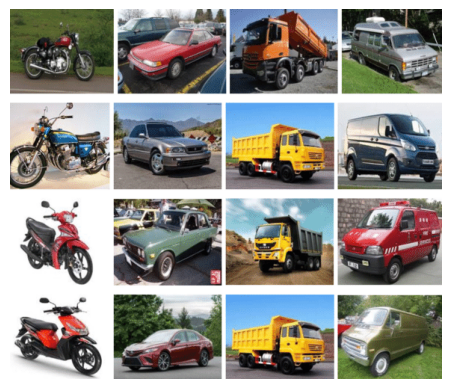

In [ ]:
import cv2
import matplotlib.pyplot as plt


image = cv2.imread("/content/vehicx.png")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()


image 1/1 /content/vehicx.png: 576x640 1 person, 9 cars, 4 motorcycles, 8 trucks, 234.6ms
Speed: 4.3ms preprocess, 234.6ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)


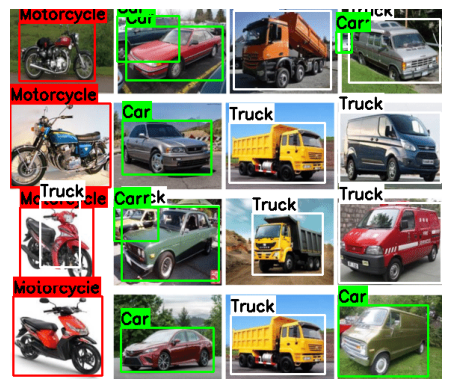

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO('yolov8n.pt')


image_path = '/content/vehicx.png'
image = cv2.imread(image_path)


results = model(image_path)


bboxes = results[0].boxes.xyxy.cpu().numpy()
classes = results[0].boxes.cls.cpu().numpy()
confidences = results[0].boxes.conf.cpu().numpy()



CAR_CLASS_ID = 2
MOTORCYCLE_CLASS_ID = 3


class_labels = {

    CAR_CLASS_ID: "Car",
    MOTORCYCLE_CLASS_ID: "Motorcycle",

}


class_colors = {
    CAR_CLASS_ID: (0, 255, 0),
    MOTORCYCLE_CLASS_ID: (0, 0, 255),

}


for bbox, cls in zip(bboxes, classes):
    x1, y1, x2, y2 = map(int, bbox)
    label = class_labels.get(cls, f"Truck")
    color = class_colors.get(cls, (255, 255, 255))


    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)


    font_scale = 0.7
    font_thickness = 2
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]
    text_width, text_height = text_size


    cv2.rectangle(image, (x1, y1 - text_height - 10), (x1 + text_width, y1), color, -1)


    cv2.putText(image, label, (x1, y1 - 5), font, font_scale, (0, 0, 0), font_thickness)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

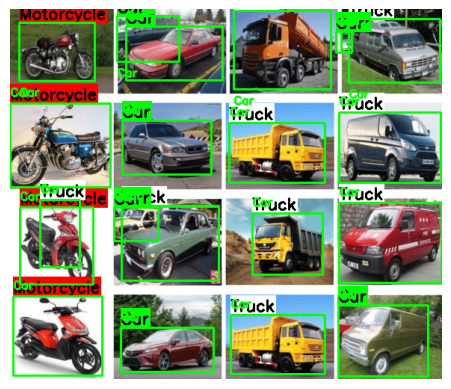

In [ ]:
for bbox, cls in zip(bboxes, classes):
    x1, y1, x2, y2 = map(int, bbox)
    label = "Truck" if cls == TRUCK_CLASS_ID else "Car"
    color = (255, 0, 0) if cls == TRUCK_CLASS_ID else (0, 255, 0)


    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)


    label_y = y1 - 10
    if label_y < 10:
        label_y = y2 + 20


    cv2.putText(image, label, (x1, label_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import os
import xml.etree.ElementTree as ET


os.makedirs('annotations', exist_ok=True)


def create_pascal_voc_annotation(image, bboxes, classes, filename="annotation.xml"):
    root = ET.Element("annotation")
    ET.SubElement(root, "folder").text = "images"
    ET.SubElement(root, "filename").text = filename
    ET.SubElement(root, "path").text = os.path.abspath(filename)

    for bbox, cls in zip(bboxes, classes):
        object_elem = ET.SubElement(root, "object")
        ET.SubElement(object_elem, "name").text = "truck" if cls == TRUCK_CLASS_ID else "car"
        ET.SubElement(object_elem, "pose").text = "Unspecified"
        ET.SubElement(object_elem, "truncated").text = "0"
        ET.SubElement(object_elem, "difficult").text = "0"

        bndbox = ET.SubElement(object_elem, "bndbox")
        ET.SubElement(bndbox, "xmin").text = str(int(bbox[0]))
        ET.SubElement(bndbox, "ymin").text = str(int(bbox[1]))
        ET.SubElement(bndbox, "xmax").text = str(int(bbox[2]))
        ET.SubElement(bndbox, "ymax").text = str(int(bbox[3]))

    tree = ET.ElementTree(root)
    tree.write(f"annotations/{filename}")

create_pascal_voc_annotation(image, bboxes, classes, filename="vehicle_annotation.xml")